In [638]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from PIL import Image
k = 5

In [639]:
#import images
universe = cv.imread('mask.jpg')
ruimteschip = cv.imread('ruimteschip.jpg')
achtergrond = cv.imread('achtergrond.jpg')

In [640]:
# convert to RGB
universe = cv.cvtColor(universe, cv.COLOR_BGR2RGB)
ruimteschip = cv.cvtColor(ruimteschip, cv.COLOR_BGR2RGB)
achtergrond = cv.cvtColor(achtergrond, cv.COLOR_BGR2RGB)

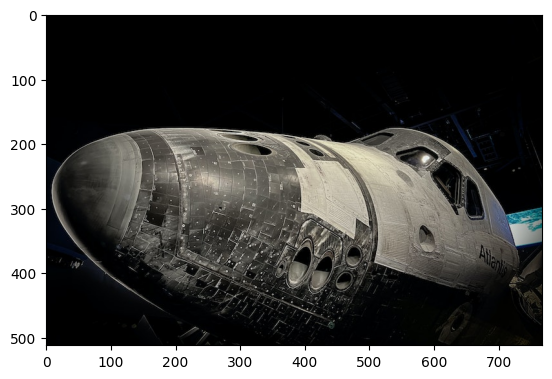

In [641]:
plt.imshow(ruimteschip)
plt.show()

In [642]:
print(universe.shape)

(512, 768, 3)


In [643]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = ruimteschip.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [644]:
print(pixel_values.shape)

(393216, 3)


In [645]:
# define stopping criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [646]:
# number of clusters (K)

_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [647]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [648]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

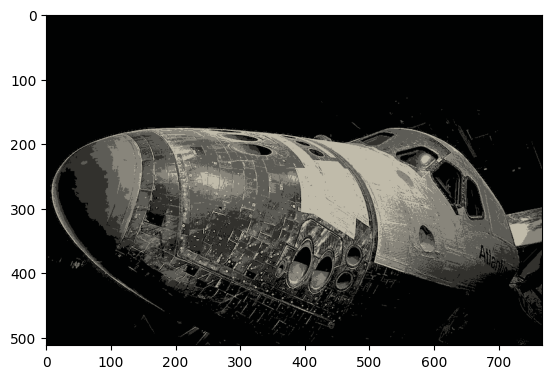

In [649]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(ruimteschip.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [650]:
# de afzonderlijke kleurkanalen (rgb). Kijk of je elk kanaal kan visualiseren
rood  = segmented_image[:,:,0]
groen = segmented_image[:,:,1]
blauw = segmented_image[:,:,2]

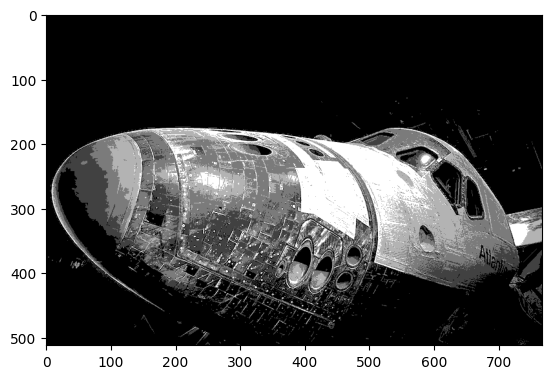

In [651]:
plt.imshow(rood,cmap='gray')
plt.show()

In [652]:
flatten_rood = rood.flatten()
flatten_rood.shape

(393216,)

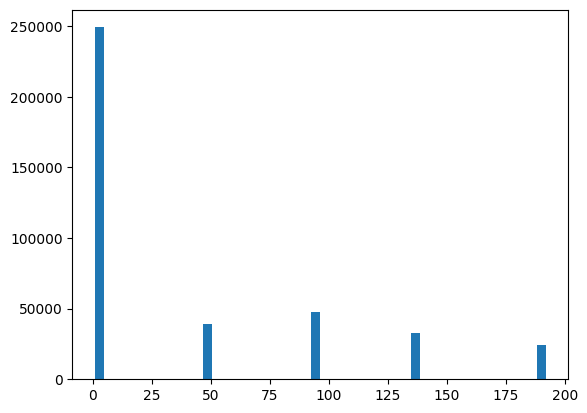

In [653]:
plt.hist(flatten_rood,bins=50)
plt.show()

In [654]:
mask_A = np.zeros(rood.shape[:2], np.uint8)
mask_A[rood > 50] = 255
mask_B = cv.bitwise_not(mask_A)

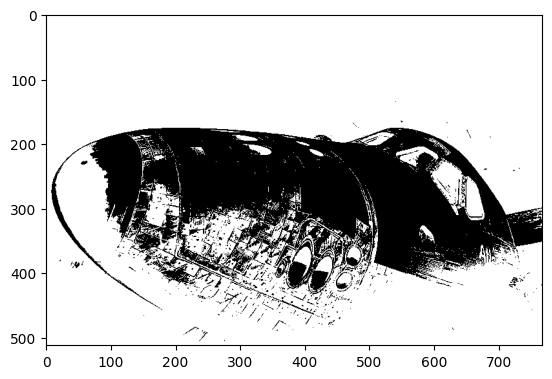

In [655]:
plt.imshow(mask_B,cmap='gray')
plt.show()

In [656]:
# get first masked value (foreground)
foreground = cv.bitwise_and(universe, universe, mask=mask_A)
backgorund = cv.bitwise_and(achtergrond, achtergrond, mask=mask_B)

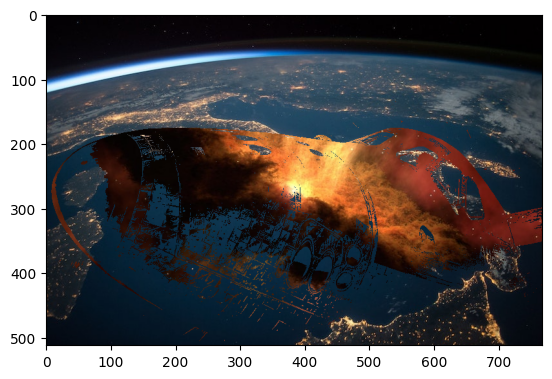

In [657]:
# combine foreground+background
final = cv.bitwise_or(foreground, backgorund)
plt.imshow(final)
plt.show()